# Data Exploration

In this notebook I do some exploring on the dataset.

In [68]:
import pandas as pd
import os

DATA_PATH = '../data/raw/jan_2025_ontime.csv'

df = pd.read_csv(DATA_PATH)

print(f"Loaded {df.shape[0]} rows.")

print("Columns: \n", list(df.columns))

Loaded 539747 rows.
Columns: 
 ['YEAR', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'ORIGIN_AIRPORT_ID', 'ORIGIN', 'DEST_AIRPORT_ID', 'DEST', 'CRS_DEP_TIME', 'DEP_DELAY', 'DEP_DEL15', 'CRS_ARR_TIME', 'ARR_DELAY', 'ARR_DEL15', 'CANCELLED', 'DIVERTED', 'DISTANCE']


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539747 entries, 0 to 539746
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   YEAR               539747 non-null  int64  
 1   MONTH              539747 non-null  int64  
 2   DAY_OF_MONTH       539747 non-null  int64  
 3   DAY_OF_WEEK        539747 non-null  int64  
 4   OP_UNIQUE_CARRIER  539747 non-null  object 
 5   ORIGIN_AIRPORT_ID  539747 non-null  int64  
 6   ORIGIN             539747 non-null  object 
 7   DEST_AIRPORT_ID    539747 non-null  int64  
 8   DEST               539747 non-null  object 
 9   CRS_DEP_TIME       539747 non-null  int64  
 10  DEP_DELAY          523824 non-null  float64
 11  DEP_DEL15          523824 non-null  float64
 12  CRS_ARR_TIME       539747 non-null  int64  
 13  ARR_DELAY          522269 non-null  float64
 14  ARR_DEL15          522269 non-null  float64
 15  CANCELLED          539747 non-null  float64
 16  DI

## Key Observation 

Notice that the "Non-Null" Count is different between some of the columns:

We have 539,747 flight records (rows).

All 539,747 flights have a non-null value for Scheduled Departure Time (CRS_DEP_TIME).

But only 522,269 flights have a non-null value for their Arrival Delay (ARR_DELAY).

(539,747 - 522,269) = 17,478

In other words, 17,478 flight records in our dataset do not have a value for how the delayed the arrival was.

This could be because there exist flights that get cancelled or divereted, which will not have a arrival delay time since they never end up arriving.

I'll check and confirm this:

In [70]:
# Create a mask for "Abnormal Flights"
# logic: (Cancelled is True) OR (Diverted is True)
abnormal_mask = (df['CANCELLED'] == 1) | (df['DIVERTED'] == 1)

# Apply the mask to create a subset dataframe
bad_flights = df[abnormal_mask]

print(f"Found {len(bad_flights)} Cancelled or Diverted flights.")

# VERIFICATION STEP:
# Count how many of these 'bad' flights have a value for ARR_DELAY.
# We expect this to be 0. If it's not 0, the data is weird.
non_null_delays = bad_flights['ARR_DELAY'].count() 

print(f"Number of Cancelled/Diverted flights that have a recorded delay: {non_null_delays}")

# Visual Inspection
print("\nSample of 'Bad' flights (Expect NaN in ARR_DELAY):")
display(bad_flights[['DATE', 'OP_UNIQUE_CARRIER', 'CANCELLED', 'DIVERTED', 'ARR_DELAY']].head() if 'DATE' in df.columns else bad_flights)


Found 17478 Cancelled or Diverted flights.
Number of Cancelled/Diverted flights that have a recorded delay: 0

Sample of 'Bad' flights (Expect NaN in ARR_DELAY):


,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,CRS_DEP_TIME,DEP_DELAY,DEP_DEL15,CRS_ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
9,2025,1,1,3,AA,10257,ALB,11298,DFW,537,16.0,1.0,854,NaN,NaN,0.0,1.0,1435.0
735,2025,1,1,3,AA,11298,DFW,12441,JAC,1235,-10.0,0.0,1438,NaN,NaN,0.0,1.0,1047.0
1703,2025,1,1,3,AA,13930,ORD,11057,CLT,700,NaN,NaN,1001,NaN,NaN,1.0,0.0,599.0
1777,2025,1,1,3,AA,13930,ORD,13495,MSY,1025,1.0,0.0,1256,NaN,NaN,0.0,1.0,837.0
2339,2025,1,1,3,AA,15024,STT,11057,CLT,1605,-15.0,0.0,1920,NaN,NaN,0.0,1.0,1520.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537818,2025,1,31,5,WN,13830,OGG,12173,HNL,805,NaN,NaN,850,NaN,NaN,1.0,0.0,100.0
537819,2025,1,31,5,WN,13830,OGG,12173,HNL,930,NaN,NaN,1020,NaN,NaN,1.0,0.0,100.0
538896,2025,1,31,5,YX,10721,BOS,13930,ORD,1159,-3.0,0.0,1401,NaN,NaN,0.0,1.0,867.0
539042,2025,1,31,5,YX,11278,DCA,12339,IND,641,NaN,NaN,841,NaN,NaN,1.0,0.0,500.0


This confirms that Cancelled/Diverted flights yield no arrival delay data, and that missing data is exclusively from Cancelled/Diverted flights. 

These should be dropped.



In [71]:
# 1. Create a copy to clean
df_clean = df.copy()

# 2. The Clean
# logic: Drop any row where ARR_DELAY is NaN. 
# Based on our audit, we know this removes all Cancelled/Diverted flights.
df_clean = df_clean.dropna(subset=['ARR_DELAY'])


In [72]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 522269 entries, 0 to 539746
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   YEAR               522269 non-null  int64  
 1   MONTH              522269 non-null  int64  
 2   DAY_OF_MONTH       522269 non-null  int64  
 3   DAY_OF_WEEK        522269 non-null  int64  
 4   OP_UNIQUE_CARRIER  522269 non-null  object 
 5   ORIGIN_AIRPORT_ID  522269 non-null  int64  
 6   ORIGIN             522269 non-null  object 
 7   DEST_AIRPORT_ID    522269 non-null  int64  
 8   DEST               522269 non-null  object 
 9   CRS_DEP_TIME       522269 non-null  int64  
 10  DEP_DELAY          522269 non-null  float64
 11  DEP_DEL15          522269 non-null  float64
 12  CRS_ARR_TIME       522269 non-null  int64  
 13  ARR_DELAY          522269 non-null  float64
 14  ARR_DEL15          522269 non-null  float64
 15  CANCELLED          522269 non-null  float64
 16  DIVERTE

In [73]:
df_clean

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,CRS_DEP_TIME,DEP_DELAY,DEP_DEL15,CRS_ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
0,2025,1,1,3,AA,10140,ABQ,11298,DFW,500,-8.0,0.0,754,-21.0,0.0,0.0,0.0,569.0
1,2025,1,1,3,AA,10140,ABQ,11298,DFW,555,-3.0,0.0,849,-17.0,0.0,0.0,0.0,569.0
2,2025,1,1,3,AA,10140,ABQ,11298,DFW,820,-5.0,0.0,1114,-22.0,0.0,0.0,0.0,569.0
3,2025,1,1,3,AA,10140,ABQ,11298,DFW,1032,-3.0,0.0,1323,-23.0,0.0,0.0,0.0,569.0
4,2025,1,1,3,AA,10140,ABQ,11298,DFW,1700,7.0,0.0,1948,17.0,1.0,0.0,0.0,569.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539742,2025,1,31,5,YX,15412,TYS,13930,ORD,620,-10.0,0.0,727,-22.0,0.0,0.0,0.0,475.0
539743,2025,1,31,5,YX,15412,TYS,13930,ORD,1359,-9.0,0.0,1455,0.0,0.0,0.0,0.0,475.0
539744,2025,1,31,5,YX,15919,XNA,12953,LGA,630,-6.0,0.0,1042,-23.0,0.0,0.0,0.0,1147.0
539745,2025,1,31,5,YX,15919,XNA,12953,LGA,1515,-10.0,0.0,1912,-2.0,0.0,0.0,0.0,1147.0


Since we removed the rows where Cancelled=1, the 'CANCELLED' column is now entirely 0s.

It is redunadnt and provides no value to a model we may train. same for DIVERTED.

In [74]:
# 3. Cleanup Columns
df_clean = df_clean.drop(columns=['CANCELLED', 'DIVERTED'])
df_clean

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,CRS_DEP_TIME,DEP_DELAY,DEP_DEL15,CRS_ARR_TIME,ARR_DELAY,ARR_DEL15,DISTANCE
0,2025,1,1,3,AA,10140,ABQ,11298,DFW,500,-8.0,0.0,754,-21.0,0.0,569.0
1,2025,1,1,3,AA,10140,ABQ,11298,DFW,555,-3.0,0.0,849,-17.0,0.0,569.0
2,2025,1,1,3,AA,10140,ABQ,11298,DFW,820,-5.0,0.0,1114,-22.0,0.0,569.0
3,2025,1,1,3,AA,10140,ABQ,11298,DFW,1032,-3.0,0.0,1323,-23.0,0.0,569.0
4,2025,1,1,3,AA,10140,ABQ,11298,DFW,1700,7.0,0.0,1948,17.0,1.0,569.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539742,2025,1,31,5,YX,15412,TYS,13930,ORD,620,-10.0,0.0,727,-22.0,0.0,475.0
539743,2025,1,31,5,YX,15412,TYS,13930,ORD,1359,-9.0,0.0,1455,0.0,0.0,475.0
539744,2025,1,31,5,YX,15919,XNA,12953,LGA,630,-6.0,0.0,1042,-23.0,0.0,1147.0
539745,2025,1,31,5,YX,15919,XNA,12953,LGA,1515,-10.0,0.0,1912,-2.0,0.0,1147.0


In [75]:
# 4. Reset Index
# If we dropped row #2, the index skips from 1 to 3. 
df_clean = df_clean.reset_index(drop=True)

print(f"Original Rows: {len(df)}")
print(f"Clean Rows:    {len(df_clean)}")
print(f"Rows Dropped:  {len(df) - len(df_clean)}")

Original Rows: 539747
Clean Rows:    522269
Rows Dropped:  17478


For fun, I also want to verify the definition of “Late” (represented by the binary ARR_DEL15 column). The dataset defines "late" as a delay >= 15 minutes. I'll caluculate this myself using the ARR_DELAY column to be absolutely sure the ARR_DEL15 colunm isn't lying.

In [76]:
import numpy as np

# 1. Verify the 'Late' Definition
# We manually calculate if delay >= 15
manual_late = np.where(df_clean['ARR_DELAY'] >= 15, 1.0, 0.0)

# Compare with the provided 'ARR_DEL15' column
# The difference should be 0.
mismatches = np.sum(manual_late != df_clean['ARR_DEL15'])
print(f"Mismatches between Manual Calculation and Provided Label: {mismatches}")




Mismatches between Manual Calculation and Provided Label: 0


For some more pandas practice, I'll check what percentage of flights are late.

In [77]:
# 2. Calculate the Balance
# How many 1s vs 0s?
num_late = df_clean['ARR_DEL15'].sum()
percent_late = (num_late / len(df_clean)) * 100

print(f"\nLate Percentage: {percent_late:.2f}%")


Late Percentage: 18.79%


This implies that 81.21% of flights arrive to their destination "On Time." I was surprised to learn that. I did some digging online to find out if this is accurate, and it is. 

It was news to me to find out that the airline industry does a significant amount of [schedule padding](https://en.wikipedia.org/wiki/Schedule_padding)

Airlines know that airports are crowded and taxiing takes time, so if a flight from JFK to LAX takes 5 hours and 30 minutes of pure flying, they will publish a schedule that says it takes 6 hours, for example.

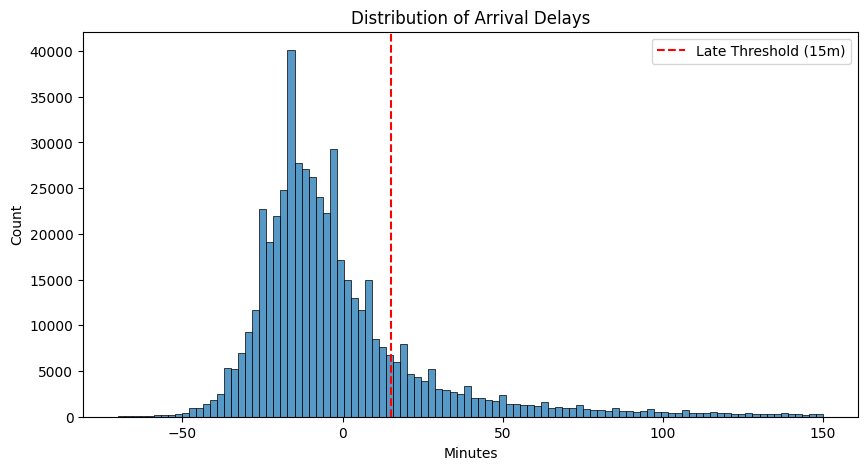

In [78]:
# 3. Visualize
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
# Histogram of the Minutes
sns.histplot(df_clean['ARR_DELAY'], bins=100, binrange=(-70, 150))
plt.axvline(15, color='r', linestyle='--', label='Late Threshold (15m)')
plt.title("Distribution of Arrival Delays")
plt.xlabel("Minutes")
plt.legend()
plt.show()

From now on I will no longer be pleasently suprised when I arrive earlier than the scheduled arrival time on my flight ticket. It seems its to be expected. (At least in January 2025).